In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.1 MB/s eta 0:00:00


untuk suhu 22 derajat dan kelembaban 75%, kecepatan kipas AC: 75.00%


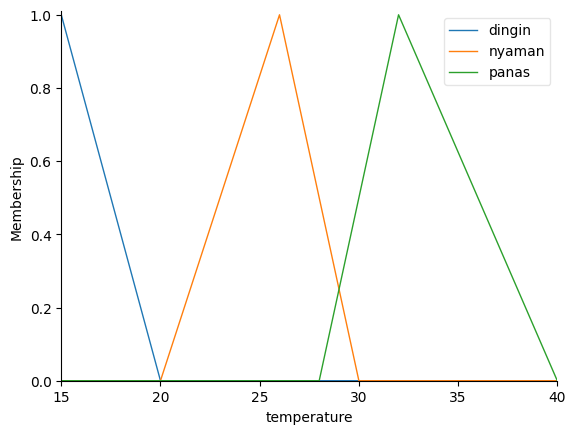

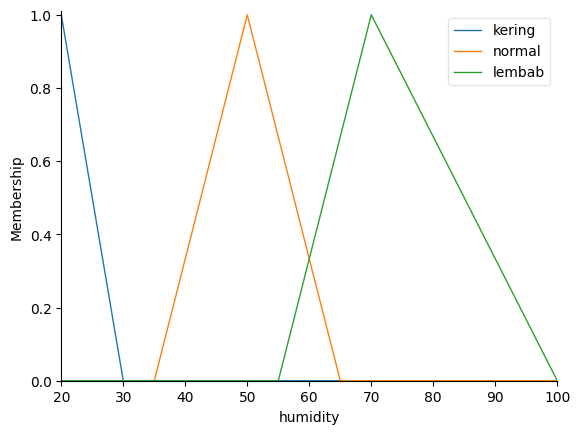

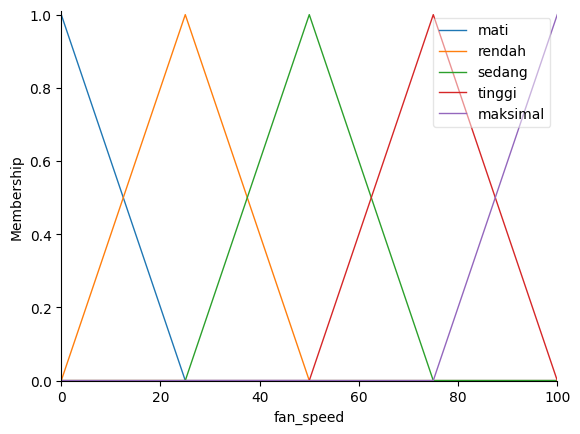

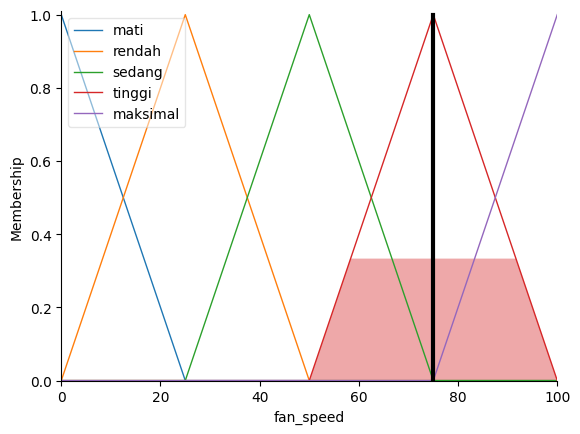

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

temperature = ctrl.Antecedent(np.arange(15,41,1),'temperature')
humidity = ctrl.Antecedent(np.arange(20,101,1),'humidity')
fan_speed = ctrl.Consequent(np.arange(0,101,1),'fan_speed')

# Corrected the parameters for trimf to have 3 elements
temperature['dingin'] = fuzz.trimf(temperature.universe,[15,15,20]) # Changed from [15,15,20,24] to [15,15,20]
temperature['nyaman'] = fuzz.trimf(temperature.universe,[20,26,30])
temperature['panas'] = fuzz.trimf(temperature.universe,[28,32,40])  # Changed from [28,32,40,40] to [28,32,40]


humidity['kering'] = fuzz.trimf(humidity.universe,[20,20,30])  # Changed from [20,20,30,45] to [20,20,30]
humidity['normal'] = fuzz.trimf(humidity.universe,[35,50,65])
humidity['lembab'] = fuzz.trimf(humidity.universe,[55,70,100]) # Changed from [55,70,100,100] to [55,70,100]

fan_speed['mati'] = fuzz.trimf(fan_speed.universe,[0,0,25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe,[0,25,50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe,[25,50,75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe,[50,75,100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe,[75,100,100])

temperature.view()
humidity.view()
fan_speed.view()

rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'],fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'],fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'],fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'],fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'],fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'],fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'],fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'],fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'],fan_speed['maksimal'])

ac_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

ac.input['temperature'] = 22
ac.input['humidity'] = 75

ac.compute()
print(f"untuk suhu 22 derajat dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

fan_speed.view(sim=ac)
plt.show()

untuk suhu 22 derajat terletak diantara dingin dan nyaman. Karena suhu 22 derajat C punya nilai keanggotaan sebagian di "dingin" dan "nyaman", maka keduanya aktif sebagian. Hasil akhirnya adalah kombinasi (gabungan fuzzy) dari "rendah" dan "tinggi".

untuk suhu 30 derajat dan kelembaban 75%, kecepatan kipas AC: 90.28%


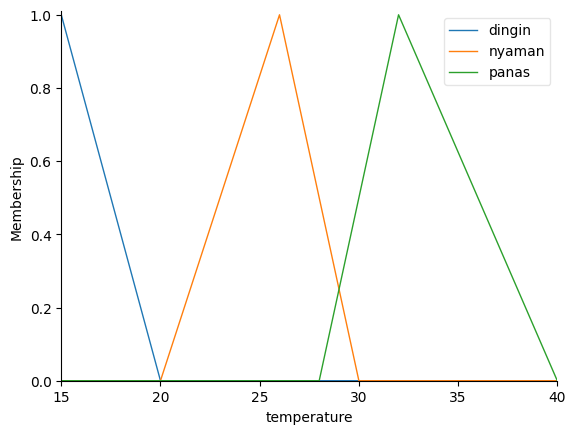

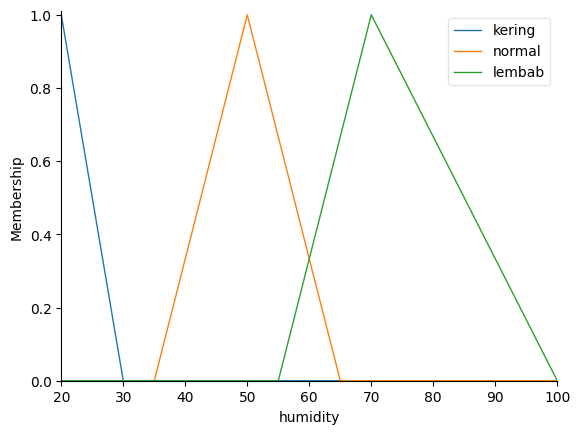

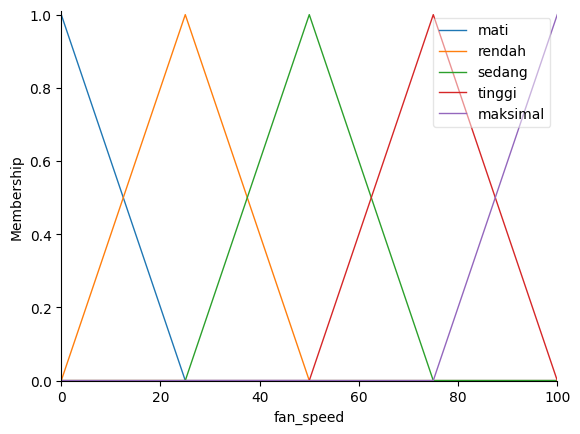

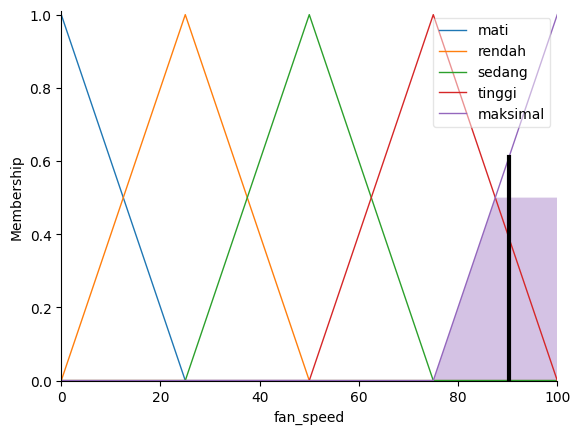

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

temperature = ctrl.Antecedent(np.arange(15,41,1),'temperature')
humidity = ctrl.Antecedent(np.arange(20,101,1),'humidity')
fan_speed = ctrl.Consequent(np.arange(0,101,1),'fan_speed')
pressure = ctrl.Antecedent(np.arange(950, 1061, 1), 'pressure')

temperature['dingin'] = fuzz.trimf(temperature.universe,[15,15,20])
temperature['nyaman'] = fuzz.trimf(temperature.universe,[20,26,30])
temperature['panas'] = fuzz.trimf(temperature.universe,[28,32,40])


humidity['kering'] = fuzz.trimf(humidity.universe,[20,20,30])
humidity['normal'] = fuzz.trimf(humidity.universe,[35,50,65])
humidity['lembab'] = fuzz.trimf(humidity.universe,[55,70,100])

fan_speed['mati'] = fuzz.trimf(fan_speed.universe,[0,0,25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe,[0,25,50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe,[25,50,75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe,[50,75,100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe,[75,100,100])

pressure['rendah'] = fuzz.trimf(pressure.universe, [950, 950, 990])
pressure['normal'] = fuzz.trimf(pressure.universe, [980, 1010, 1040])
pressure['tinggi'] = fuzz.trimf(pressure.universe, [1020, 1060, 1060])

temperature.view()
humidity.view()
fan_speed.view()

rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'],fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'],fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'],fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'],fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'],fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'],fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'],fan_speed['tinggi'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'],fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'],fan_speed['maksimal'])
rule10 = ctrl.Rule(pressure['rendah'] & temperature['nyaman'], fan_speed['sedang'])
rule11 = ctrl.Rule(pressure['tinggi'] & temperature['panas'], fan_speed['maksimal'])

ac_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

ac.input['temperature'] = 30
ac.input['humidity'] = 75
ac.input['pressure'] = 1030

ac.compute()
print(f"untuk suhu 30 derajat dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

fan_speed.view(sim=ac)
plt.show()

Mengapa suhu 28°C punya keanggotaan di "nyaman" dan "panas"?
Ini karena bentuk fungsi keanggotaan fuzzy kamu adalah segitiga (trimf), yang saling tumpang tindih.
Titik 28 berada di ujung kanan segitiga “nyaman”, jadi masih punya nilai keanggotaan. Tapi 28 juga berada di ujung kiri segitiga “panas”, jadi masuk juga ke “panas”.